# Praca domowa 2

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas_profiling as pp 
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error 

### Wczytanie danych

In [5]:
data = pd.read_csv("allegro-api-transactions.csv")
data

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


In [4]:
data.info() # 14 kolumn, bez braków danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

## Zadanie 1

In [52]:
data['it_location'].value_counts()
data['price']

0          59.99
1           4.90
2         109.90
3          18.50
4          19.90
           ...  
420015    180.00
420016     14.99
420017      5.99
420018    200.00
420019    500.00
Name: price, Length: 420020, dtype: float64

### Target encoding

##### Target encoding polega na obliczeniu średniej wartości w kolumnie 'target' dla danej kategorii, a następnie zastąpieniu wartości kategorycznej obliczoną średnią

#### Zalety Target encoding w porównaniu z One-Hot encoding:
- Wartości są przechowywane w jednej kolumnie
- Target encoding dostarcza dodatkowych informacji statystycznych na temat danych

In [79]:
encoder = ce.TargetEncoder(cols = 'it_location')
encoder.fit_transform(data['it_location'], data['price'])

,it_location
0,85.423398
1,85.423398
2,61.990914
3,35.433365
4,117.191956
...,...
420015,24.306929
420016,66.785334
420017,18.682800
420018,106.203076


### One-hot encoding

##### One-hot encoding polega na utworzeniu tabeli o liczbie kolumn odpowiadającej liczbie kategorii. Wartość 1 oznacza przynależność produktu do danej kategorii.

In [7]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(np.array(data['main_category']).reshape(-1, 1))
np.array(data['main_category']).reshape(-1, 1)

cols = data['main_category'].unique()
cols = np.sort(cols)
df = pd.DataFrame(onehot_encoded, columns = cols)
df

,Antyki i Sztuka,Bilety,Biuro i Reklama,Biżuteria i Zegarki,Delikatesy,Dla Dzieci,Dom i Ogród,Filmy,Fotografia,Gry,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
420017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binary Encoding

Kodowanie binarne polega na zamianie numeru kategorii na kolejne liczby binarne, a następnie umieszczeniu ich w kolumnach (1 bit na 1 kolumnę). W powyższy sposób dla N kategorii otrzymujemy $log_2{N}$ kolumn.

In [80]:
encoder=ce.BinaryEncoder(cols='main_category',verbose=False,)
encoder.fit_transform(data['main_category'])

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
420015,0,0,0,1,1,0
420016,0,0,1,0,0,1
420017,0,0,0,0,1,0
420018,0,0,1,0,0,0


#### Porównanie liczby kolumn w One-hot Encoding oraz Binary Encoding

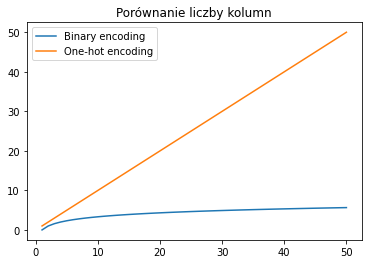

In [122]:
x = np.arange(1, 51)
y = np.log2(x)
plt.plot(x, y)
plt.plot(x, x)
plt.title("Porównanie liczby kolumn")
plt.legend(["Binary encoding", "One-hot encoding"])

### Count Encoding

Count Encoding polega na zastąpieniu wartości w kolumnie kategorycznej ilością zmiennych należących do danej kategorii.

In [77]:
encoder=ce.count.CountEncoder(cols='main_category',verbose=False,) 
encoder.fit_transform(data['main_category'])

,main_category
0,14491
1,54257
2,91042
3,11572
4,54257
...,...
420015,20341
420016,28096
420017,54257
420018,42107


## Zadanie 2

Funkcja `drop_and_fill()` zwraca wektor wartości RMSE dla 10 imputacji metodą _Nearest Neighbors Imputation_ dla 10% losowo usuniętych wartości z wybranych kolumn. Funkcja przyjmuje jako argumenty ramkę danych oraz nazwy kolumn, w których 10% wartości zostało zastąpione wartościami NaN (wartości do zastąpienia są wybierane losowo i niezależnie od siebie)

In [44]:
data
data_2 = data[['price', 'it_seller_rating', 'it_quantity']]
data_2 = data_2.iloc[0:int(len(data_2)/1000),] # w celu szybszego działania
len(data_2)

def drop_and_fill(dt, columns): 
    rmse = [0]*10
    for i in range(10):
        data = dt.copy()
        pom = 0
        total = []
        for column in columns:          
            v = np.random.randint(0, len(data), size= int(len(data)/10))
            realval = data[column].iloc[v]
            data[column].iloc[v] = np.nan
            imputer = KNNImputer(n_neighbors=2, weights="uniform")
            imp = imputer.fit_transform(np.array(data).reshape(-1,1))  
            predictedval = pd.DataFrame(imp).iloc[v] 
            total.append(mean_squared_error(realval, predictedval, squared = False)*len(realval))
        rmse[i] = math.sqrt(sum(total)/ (len(columns)*len(realval)))
    return rmse


rmse_1 = drop_and_fill(data_2, ['it_seller_rating']) #zobaczyć na małych ramkach
rmse_2 = drop_and_fill(data_2, ['it_seller_rating', 'it_quantity'])


Odchylenie standardowe wyniku imputacji dla usuniętych wartości z kolumn: 
it_seller_rating: 22.000632842723874
it_seller_rating & it_quantity: 15.146271292911019


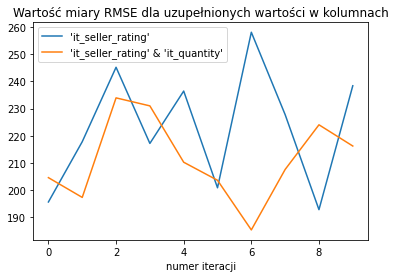

In [51]:
x = np.arange(10)
plt.plot(x, rmse_1)
plt.plot(x, rmse_2)
plt.title("Wartość miary RMSE dla uzupełnionych wartości w kolumnach")
plt.legend(["'it_seller_rating'", "'it_seller_rating' & 'it_quantity'"])
plt.xlabel("numer iteracji")

print(f"Odchylenie standardowe wyniku imputacji dla usuniętych wartości z kolumn: \nit_seller_rating:", pd.Series(rmse_1).std())
print(f"it_seller_rating & it_quantity:", pd.Series(rmse_2).std())


Jakość imputacji zależy od wielkości ramki danych oraz od wyboru brakujących wartości. Na podstawie wyżej zamieszczonego wykresu losowy wybór wartości do usunięcia miał większy wpływ na wielkość miary RMSE niż usunięcie wartości z więcej niż jednej kolumny.